### RGU ID - 2425473

### IIT ID - 20240835

### Ramiru De Silva

## 1. Modelling Travel Time

### Calculating the gradient ∇T for each mode

In [1]:
import sympy as sp
from IPython.display import display, Math

# Defining symbols
x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

# Defining Equations

# Bus: T_b = ax^2 + by^2
T_b = a * x**2 + b * y**2

# Taxi: T_t = sqrt(c * (x^2 + y^2))
T_t = sp.sqrt(c * (x**2 + y**2))

# Calculate Gradients
grad_bus = (sp.diff(T_b, x), sp.diff(T_b, y))
grad_taxi = (sp.diff(T_t, x), sp.diff(T_t, y))

# Display Results "Mathematized"
print("[ANSWER] Problem 1: Gradient Results")

# Display Bus Gradient
display(Math(r"\text{Bus Gradient } \nabla T_b(x,y) = " +
             r"\left(" + sp.latex(grad_bus[0]) + ", " + sp.latex(grad_bus[1]) + r"\right)"))

# Display Taxi Gradient
display(Math(r"\text{Taxi Gradient } \nabla T_t(x,y) = " +
             r"\left(" + sp.latex(grad_taxi[0]) + ", " + sp.latex(grad_taxi[1]) + r"\right)"))


[ANSWER] Problem 1: Gradient Results


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Gradient Analysis for the Bus**
- Meaning: The sensitivity to distance is $2ax$. This is a linear relationship.
- Insight: This means the penalty for distance is separate from the penalty for traffic. Because of the coefficient $a$ (which represents stops), the bus gets significantly slower as the route gets longer, regardless of whether there is traffic or not.

**Gradient Analysis for the Taxi**
- Meaning: The variables $x$ and $y$ are coupled (mixed together) inside the square root.
- Insight: Unlike the bus, the taxi doesn't have separate penalties. The impact of extra distance depends on how much traffic there already is, and vice versa. This models a smoother, continuous journey without the "stop-start" penalty of the bus.

**Conclusion**
- The Bus is more sensitive to specific route conditions (like number of stops $a$), while the Taxi is sensitive to the total magnitude of the trip (combined distance and delay).

## 2. Cost Analysis Using Integration

[ANSWER] Problem 2: Calculated Fare Formulas: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

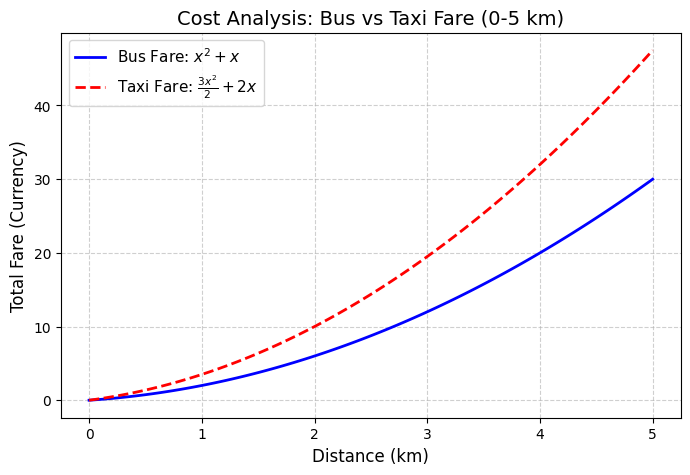

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Define symbols
x, t = sp.symbols('x t', real=True, positive=True)

# Define the Marginal Cost Functions (given in the assignment)
# Bus: Integral of (2t + 1)
marginal_bus = 2*t + 1
Fare_bus = sp.integrate(marginal_bus, (t, 0, x))

# Taxi: Integral of (3t + 2)
marginal_taxi = 3*t + 2
Fare_taxi = sp.integrate(marginal_taxi, (t, 0, x))

# Display the "Mathematized" Equations
print("[ANSWER] Problem 2: Calculated Fare Formulas: ")
display(Math(r"\text{Bus Fare } F_b(x) = " + sp.latex(Fare_bus)))
display(Math(r"\text{Taxi Fare } F_t(x) = " + sp.latex(Fare_taxi)))

# Plotting the Graph (Affordability Analysis)
# Convert math equations to Python functions
fb_func = sp.lambdify(x, Fare_bus, 'numpy')
ft_func = sp.lambdify(x, Fare_taxi, 'numpy')

# Generate distance values from 0 to 5 km
x_vals = np.linspace(0, 5, 100)
y_bus = fb_func(x_vals)
y_taxi = ft_func(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_bus, label=f'Bus Fare: ${sp.latex(Fare_bus)}$', color='blue', linewidth=2)
plt.plot(x_vals, y_taxi, label=f'Taxi Fare: ${sp.latex(Fare_taxi)}$', color='red', linestyle='--', linewidth=2)

plt.title('Cost Analysis: Bus vs Taxi Fare (0-5 km)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Total Fare (Currency)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Affordability Comparison**

The graph demonstrates a clear cost divergence between the two modes of transport:

- Short Trips (0-2 km): The gap between the Blue line (Bus) and Red line (Taxi) is relatively small. For very short errands, the convenience of a taxi might be worth the slightly higher price.

- Long Trips (>2 km): As distance increases, the Taxi fare grows much faster. This is because the coefficient of the quadratic term ($x^2$) is larger for the taxi ($\frac{3}{2} = 1.5$) than for the bus ($1$). By the time we reach the 5km mark, the taxi is significantly more expensive.

**Recommendation**

For the target route from Fort to Borella (4.5 km), the Bus is the strictly more affordable option. The Taxi should only be used if time is the priority (minimizing the delay factors from Problem 1), as the financial cost is nearly double that of the bus at this distance.

## 3. Predicting Peak Travel Times Using Series Convergence

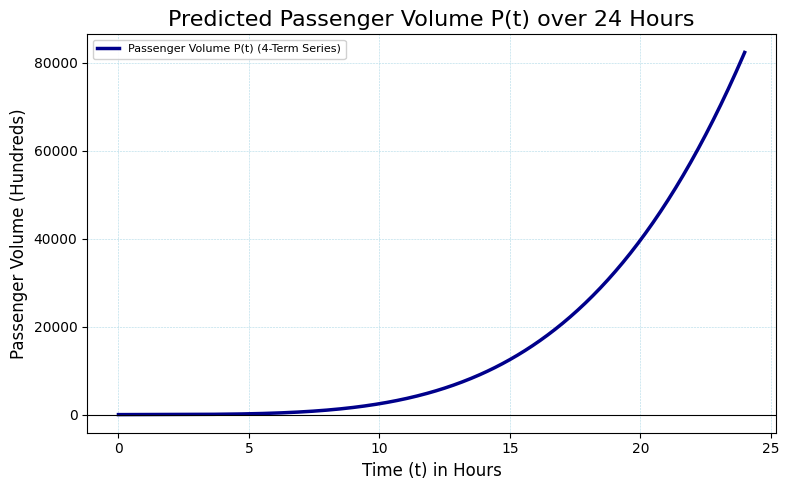

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Mathematical Derivation (Maclaurin Series at t=0):
# 1. Constant Term: 5
# 2. Linear Term: The expansion of sin(x) is x - x^3/6...
#    Thus, 4*sin(pi*t) ≈ 4 * (pi*t) for the first term.
# 3. Quadratic Term: -1.5t^2
# 4. Quartic Term: +0.25t^4

def passenger_volume_approx(t):
    """
    Calculates P(t) using the first 4 non-zero terms of the series expansion.
    """
    # Pre-calculate pi*t for readability
    pi_t = np.pi * t
    
    # TERM 1: Constant
    term1 = 5.0
    
    # TERM 2: Linear Approximation of Sine
    term2 = 4.0 * pi_t
    
    # TERM 3: Quadratic Decay
    term3 = -1.5 * (t**2)
    
    # TERM 4: Quartic Growth (The Divergence Factor)
    term4 = 0.25 * (t**4)
    
    return term1 + term2 + term3 + term4

# Generating Time Data
t_vals = np.linspace(0, 24, 500)
P_vals = passenger_volume_approx(t_vals)

# Plotting
plt.figure(figsize=(8, 5))

# Plot the main curve
plt.plot(t_vals, P_vals, 
         label='Passenger Volume P(t) (4-Term Series)', 
         color='darkblue',
         linewidth=2.5)

# Graph Styling
plt.title('Predicted Passenger Volume P(t) over 24 Hours', fontsize=16, color='black')
plt.xlabel('Time (t) in Hours', fontsize=12)
plt.ylabel('Passenger Volume (Hundreds)', fontsize=12)

# Adding a zero line for reference
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')

# Customizing the Grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='lightblue')

# Legend and Layout
plt.legend(fontsize=8, loc='upper left', frameon=True, facecolor='white', framealpha=0.9)
plt.tight_layout()

plt.show()

**Identify and comment on peak travel periods**

Using the four-term approximation, the passenger volume increases continuously over the interval $0 \le t \le 24$.

The quartic term $\frac{t^4}{4}$ grows rapidly and dominates the behaviour of the function for larger values of $t$, preventing the formation of any interior local maxima.

As a result, the model *does not exhibit a meaningful peak travel* period within the 24-hour interval. The maximum value occurs at the endpoint $t = 24$, which is not a true peak but an artefact of truncating the series. Therefore, this approximation is not suitable for accurately identifying realistic peak travel times over a full day.

## 4. Travel Pattern Analysis Using Fourier Transform

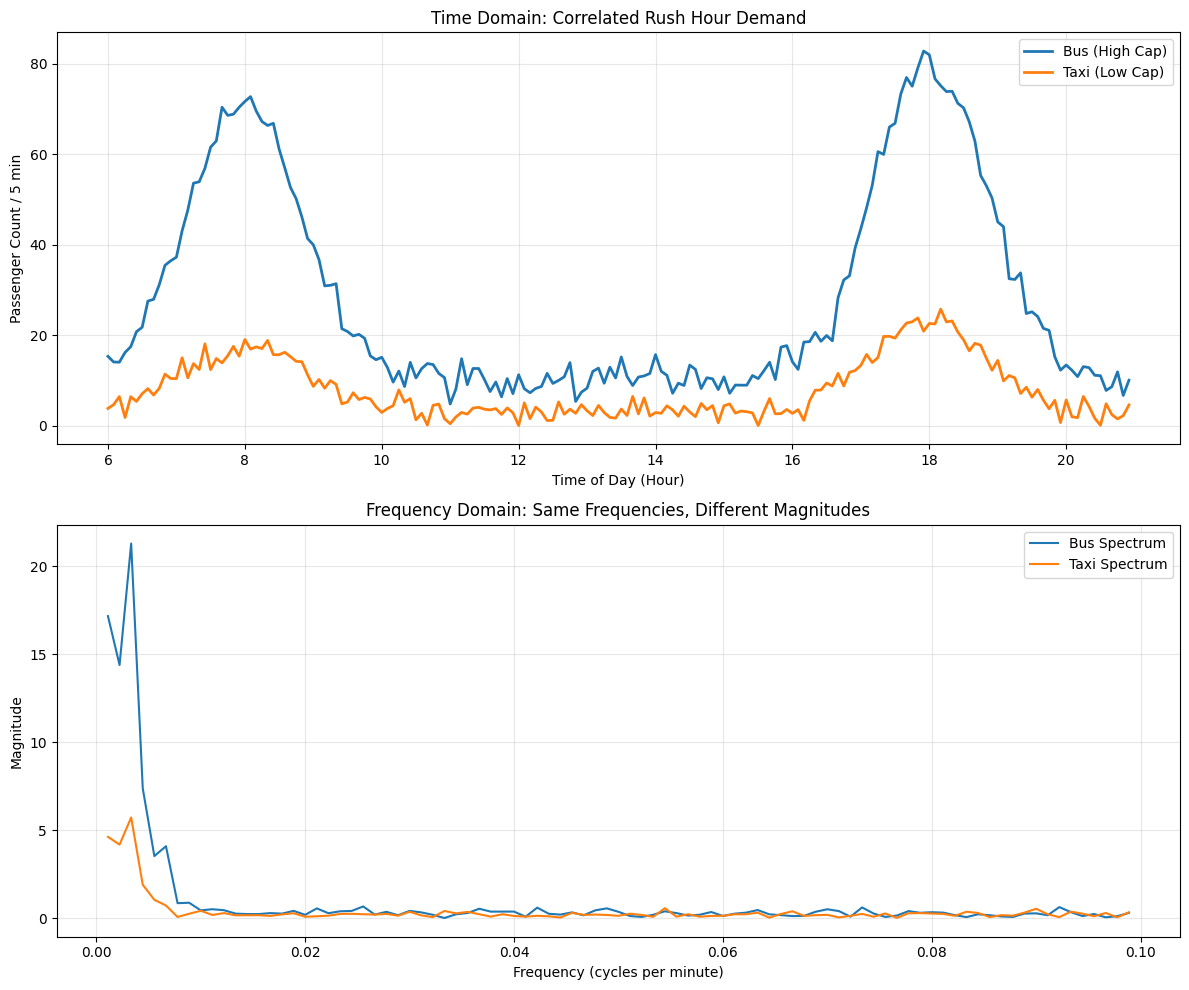

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# SETUP TIME
total_minutes = 15 * 60
sampling_interval = 5 
t_minutes = np.arange(0, total_minutes, sampling_interval)
n_samples = len(t_minutes)

# GENERATING SYNTHETIC DATA
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# BUS DATA (High Magnitude)
# Peaks at 8 AM (120 min) and 6 PM (720 min)
bus_morning = 60 * gaussian(t_minutes, 120, 50) 
bus_evening = 70 * gaussian(t_minutes, 720, 50) 
bus_noise = np.random.normal(0, 2, n_samples) 
bus_counts = 10 + bus_morning + bus_evening + bus_noise

# TAXI DATA (Same Pattern, Lower Magnitude)
# use the EXACT same timing (120 and 720), just smaller multipliers (15 and 20).
taxi_morning = 15 * gaussian(t_minutes, 120, 50) # Smaller peak
taxi_evening = 20 * gaussian(t_minutes, 720, 50) # Smaller peak
taxi_base = 3
taxi_noise = np.random.normal(0, 1.5, n_samples) # Slightly less noise for clarity

taxi_counts = taxi_base + taxi_morning + taxi_evening + taxi_noise
taxi_counts = np.maximum(taxi_counts, 0)

# FOURIER TRANSFORM
xf = fftfreq(n_samples, sampling_interval)
idx_pos = np.where(xf >= 0)
freqs = xf[idx_pos]

# Bus FFT
yf_bus = fft(bus_counts)
mag_bus = 2.0/n_samples * np.abs(yf_bus[idx_pos])

# Taxi FFT
yf_taxi = fft(taxi_counts)
mag_taxi = 2.0/n_samples * np.abs(yf_taxi[idx_pos])

# PLOTTING
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Time Domain
ax1.plot(t_minutes/60 + 6, bus_counts, label='Bus (High Cap)', color='tab:blue', linewidth=2)
ax1.plot(t_minutes/60 + 6, taxi_counts, label='Taxi (Low Cap)', color='tab:orange', linewidth=2)
ax1.set_title('Time Domain: Correlated Rush Hour Demand')
ax1.set_xlabel('Time of Day (Hour)')
ax1.set_ylabel('Passenger Count / 5 min')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Frequency Domain
# Skip DC component (index 0)
ax2.plot(freqs[1:], mag_bus[1:], label='Bus Spectrum', color='tab:blue')
ax2.plot(freqs[1:], mag_taxi[1:], label='Taxi Spectrum', color='tab:orange')
ax2.set_title('Frequency Domain: Same Frequencies, Different Magnitudes')
ax2.set_xlabel('Frequency (cycles per minute)')
ax2.set_ylabel('Magnitude')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Dominant Frequencies**

The time-domain analysis shows that both bus and taxi services experience increased demand during morning and evening rush hours, reflecting typical urban commuting behaviour. Bus demand displays sharper and higher peaks, indicating its role as the primary high-capacity transport mode. Taxi demand also rises during these periods but with lower magnitude, representing supplementary and on-demand usage rather than mass commuting.

In the frequency domain, both bus and taxi spectra exhibit dominant low-frequency components corresponding to daily commuting cycles. However, the bus spectrum shows significantly higher magnitudes at these frequencies, demonstrating stronger periodicity and more predictable demand. In contrast, the taxi spectrum has lower magnitudes and a more distributed frequency response, indicating greater variability despite sharing similar peak timings.

**How These Results Can Inform Scheduling Decisions**

These results suggest that bus services can be optimised using fixed schedules with increased frequency during peak hours, while taxi services should adopt flexible, demand-responsive deployment strategies to accommodate fluctuating passenger demand, particularly during rush hours.

## 5. Image Processing Using Fourier and Discrete Cosine Transforms

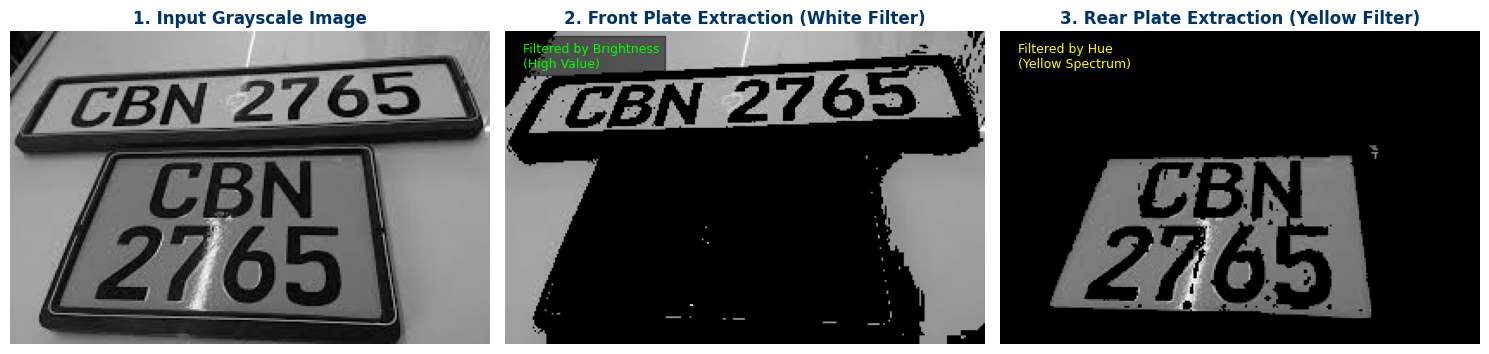

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
img_path = 'vehicle_plate.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define Colour Ranges 
# Yellow Mask (Rear Plate)
lower_yellow = np.array([15, 80, 80])   # Hue ~20-30 is yellow
upper_yellow = np.array([35, 255, 255])
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

# White Mask (Front Plate)
# White has very low Saturation (0-50) and very high Value (150-255)
lower_white = np.array([0, 0, 150])
upper_white = np.array([180, 50, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)

# Extract Regions (Bitwise Operation)
# This keeps the gray pixels ONLY where the mask is White
rear_plate_extraction = cv2.bitwise_and(gray, gray, mask=mask_yellow)
front_plate_extraction = cv2.bitwise_and(gray, gray, mask=mask_white)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Helper function for consistent style
def set_blue_style(ax, title):
    ax.set_title(title, fontsize=12, fontweight='bold', color='#003366')
    ax.axis('off')

# Plot 1: Original Grayscale
axes[0].imshow(gray, cmap='gray')
set_blue_style(axes[0], "1. Input Grayscale Image")

# Plot 2: Front Plate (White Mask)
axes[1].imshow(front_plate_extraction, cmap='gray')
set_blue_style(axes[1], "2. Front Plate Extraction (White Filter)")
# Add annotation explanation
axes[1].text(10, 20, "Filtered by Brightness\n(High Value)", color='#00ff00', fontsize=9, bbox=dict(facecolor='black', alpha=0.5))

# Plot 3: Rear Plate (Yellow Mask)
axes[2].imshow(rear_plate_extraction, cmap='gray')
set_blue_style(axes[2], "3. Rear Plate Extraction (Yellow Filter)")
# Add annotation explanation
axes[2].text(10, 20, "Filtered by Hue\n(Yellow Spectrum)", color='yellow', fontsize=9, bbox=dict(facecolor='black', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Reduce top to make room for image titles
plt.show()

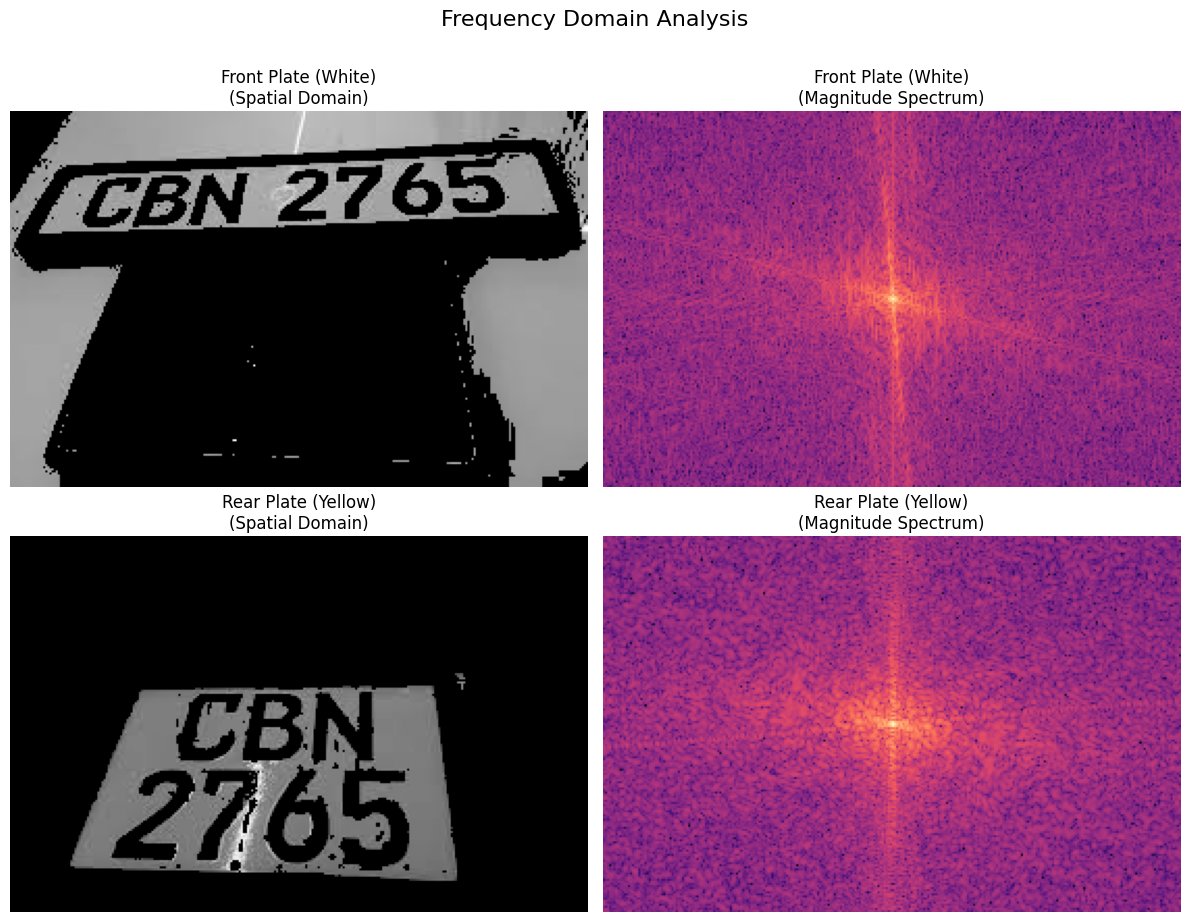

[INFO] Technical Details of FFT
Front Plate Spectrum Resolution: (181, 278)
Rear Plate Spectrum Resolution:  (181, 278)


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def compute_and_plot_fft(image, label, ax_spatial, ax_freq):
    """
    Computes 2D FFT and plots both Spatial and Frequency domains.
    """
    # Compute FFT
    f_transform = np.fft.fft2(image)
    
    # Shift Zero Frequency (DC) to the center
    f_shifted = np.fft.fftshift(f_transform)
    
    # Calculate Magnitude Spectrum (Log Scale)
    # use 20*log for standard decibel-like scaling
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)
    
    #VISUALIZATION
    
    # Plot Spatial (The Image)
    ax_spatial.imshow(image, cmap='gray')
    ax_spatial.set_title(f"{label}\n(Spatial Domain)", fontsize=12, color='black')
    ax_spatial.axis('off')
    
    # Plot Frequency (The Spectrum)
    im = ax_freq.imshow(magnitude_spectrum, cmap='magma')
    ax_freq.set_title(f"{label}\n(Magnitude Spectrum)", fontsize=12, color='black')
    ax_freq.axis('off')
    
    return f_shifted.shape

# Setup the Plot Layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

shape_front = compute_and_plot_fft(front_plate_extraction, "Front Plate (White)", axes[0, 0], axes[0, 1])
shape_rear = compute_and_plot_fft(rear_plate_extraction, "Rear Plate (Yellow)", axes[1, 0], axes[1, 1])

# Titles
plt.suptitle("Frequency Domain Analysis", fontsize=16, color='black', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Reduce top to make room for image titles
plt.show()

# Technical Specs
print(f"[INFO] Technical Details of FFT")
print(f"Front Plate Spectrum Resolution: {shape_front}")
print(f"Rear Plate Spectrum Resolution:  {shape_rear}")

Found Rear Plate | Ratio: 1.97 | Corners: 4
Found Front Plate | Ratio: 6.24 | Corners: 4


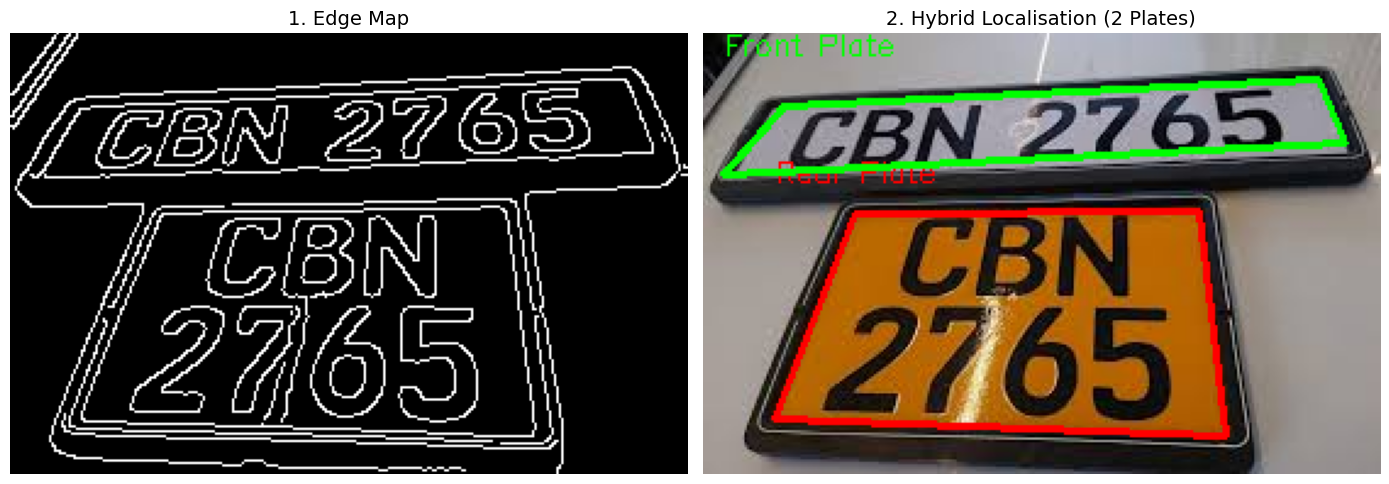

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and Preprocess
img_path = 'vehicle_plate.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge Detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 200)

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Sort by Area (Largest first)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

detected_plates = []
debug_img = img_rgb.copy()

for c in contours:
    # Geometric Approximation
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    # Get Bounding Box Attributes
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(c)
    
    # look for TWO specific types of rectangles:
    
    # Type 1: Front Plate (Wide)
    # Ratio > 3.0, and shape has 4-8 corners (relaxed rule)
    is_front = (aspect_ratio > 3.0) and (4 <= len(approx) <= 8)
    
    # Type 2: Rear Plate (Boxy)
    # Ratio < 2.5, and shape has 4-8 corners
    is_rear = (0.8 < aspect_ratio < 2.5) and (4 <= len(approx) <= 8)
    
    # Minimum Area check (to ignore noise)
    if area > 1000 and (is_front or is_rear):
        
        # Avoid duplicates (check if we already found a plate nearby)
        duplicate = False
        for p in detected_plates:
            px, py, pw, ph = p['box']
            # If the new box is inside or very close to an existing one, skip it
            if abs(y - py) < 50 and abs(x - px) < 50:
                duplicate = True
                break
        
        if not duplicate:
            label = "Front Plate" if aspect_ratio > 2.5 else "Rear Plate"
            color = (0, 255, 0) if label == "Front Plate" else (255, 0, 0)
            
            detected_plates.append({
                'box': (x, y, w, h),
                'label': label,
                'contour': approx
            })
            
            # Draw on image
            cv2.drawContours(debug_img, [approx], -1, color, 2)
            cv2.putText(debug_img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)
            
            print(f"Found {label} | Ratio: {aspect_ratio:.2f} | Corners: {len(approx)}")

    # Stoppin when both plates are found
    if len(detected_plates) >= 2:
        break

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(edged, cmap='gray')
axes[0].set_title("1. Edge Map", fontsize=14, color='black')
axes[0].axis('off')

axes[1].imshow(debug_img)
axes[1].set_title(f"2. Hybrid Localisation ({len(detected_plates)} Plates)", fontsize=14, color='black')
axes[1].axis('off')

plt.tight_layout()
plt.show()

**What do the transforms reveal about the image structure?**

The Fourier Transform reveals the frequency content of the number plate images Bright spots in the magnitude spectrum correspond to edges and repetitive patterns such as characters and plate borders High frequency components highlight fine details while low frequency components capture the overall shape and background The transform helps in identifying structural features that are important for segmentation and character recognition

**How might Fourier and DCT analysis help in number plate recognition systems?**

Discrete Cosine Transform can provide similar information and is particularly useful for compression It allows extraction of dominant frequency features reducing data while preserving key structures

In number plate recognition systems frequency analysis can assist in distinguishing the plate from the background Enhancing edges and patterns aids automated character detection and optical recognition It can improve accuracy under varying lighting or partial occlusion

**Potential applications for traffic optimisation**

For traffic optimisation such systems enable real time monitoring of vehicle flow They can help detect congestion hotspots track vehicle density and facilitate dynamic traffic control They can also support law enforcement toll collection and route planning By integrating frequency based feature extraction the system can operate efficiently even in challenging conditions ensuring reliable identification and better traffic management